In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [159]:
data = pd.read_csv("Facebook.csv")
data = data[["Text","Likes","Source"]]
candidates_names = ["لطفي المرايحي","منجي الرحوي","محمد عبو","عبير موسي","نبيل القروي","مهدي جمعة","حمادي الجبالي",
                    "حمة الهمامي"
                    ,"منصف المرزوقي","عبد الكريم الزبيدي","محسن مرزوق","محمد الصغير النوري","الهاشمي الحامدي",
                    "عبد الفتاح مورو","عمر منصور","يوسف الشاهد","قيس سعيد","إلياس الفخفاخ","سليم الرياحي",
                   "سعيد العايدي","الصافي","ناجي جلول","حاتم بولبيار","عبيد البريكي","سيف الدين مخلوف",
                   "سلمى اللومي"]



In [160]:
data.describe()

,Likes
count,199.000000
mean,343.281407
std,484.030282
min,16.000000
25%,100.500000
50%,197.000000
75%,388.500000
max,3670.000000


In [162]:
data["Candidate"] = np.random.randint(2)

In [163]:
for name in candidates_names: 
    data.loc[list(data.loc[data['Text'].str.contains(name, regex=True)].Candidate.index),"Candidate"] = name

In [ ]:
data.drop(9,inplace=True)

In [165]:
#Checking for unverified data
len(data.loc[data.Candidate==0].index)

41

In [166]:
data.loc[32,"Candidate"] = "سلمى اللومي"
data.loc[39,"Candidate"] = "عبد الكريم الزبيدي"
data.loc[41,"Candidate"] = "الصافي"
data.loc[59,"Candidate"] = "عبد الكريم الزبيدي"
data.loc[61,"Candidate"] = "عبد الفتاح مورو"
data.loc[62,"Candidate"] = "منصف المرزوقي"
data.loc[63,"Candidate"] = "منصف المرزوقي"
data.loc[65,"Candidate"] = "إلياس الفخفاخ"
data.loc[67,"Candidate"] = "نبيل القروي"
data.loc[71,"Candidate"] = "قيس سعيد"
data.loc[73,"Candidate"] = "عبيد البريكي"
data.loc[74,"Candidate"] = "عبد الفتاح مورو"
data.loc[81,"Candidate"] = "لطفي المرايحي"
data.loc[84,"Candidate"] = "يوسف الشاهد"
data.loc[86,"Candidate"] = "عبير موسي"
data.loc[87,"Candidate"] = "يوسف الشاهد"
data.loc[88,"Candidate"] = "محمد عبو"
data.loc[89,"Candidate"] = "محمد عبو"
data.loc[90,"Candidate"] = "محمد عبو"
data.loc[91,"Candidate"] = "عبد الفتاح مورو"
data.loc[92,"Candidate"] = "حمادي الجبالي"
data.loc[101,"Candidate"] = "عبد الكريم الزبيدي"
data.loc[102,"Candidate"] = "إلياس الفخفاخ"
data.loc[109,"Candidate"] = "محمد الصغير النوري"
data.loc[122,"Candidate"] = "عبد الفتاح مورو"
data.loc[124,"Candidate"] = "يوسف الشاهد"
data.loc[125,"Candidate"] = "محمد عبو"
data.loc[128,"Candidate"] = "منصف المرزوقي"
data.loc[129,"Candidate"] = "منصف المرزوقي"
data.loc[130,"Candidate"] = "سليم الرياحي"
data.loc[132,"Candidate"] = "عبد الكريم الزبيدي"
data.loc[133,"Candidate"] = "الصافي"
data.loc[134,"Candidate"] = "منجي الرحوي"
data.loc[135,"Candidate"] = "يوسف الشاهد"
data.loc[140,"Candidate"] = "محمد عبو"
data.loc[143,"Candidate"] = "منصف المرزوقي"
data.loc[144,"Candidate"] = "نبيل القروي"
data.loc[145,"Candidate"] = "سليم الرياحي"
data.loc[163,"Candidate"] = "محمد عبو"
data.loc[187,"Candidate"] = "عبد الكريم الزبيدي"
data.loc[189,"Candidate"] = "الصافي"

In [167]:
len(data.Candidate.unique())

26

<b><center>Nice we have data on each participant.</center></b>

In [168]:
# Kais Said and Safi Said have both similar last names hence the need to make some edits
for i in data.loc[data.Candidate=="الصافي"].index:
    data.loc[i,"Candidate"] = "الصافي السعيد"

In [169]:
data["Last_Name"] = data.Candidate.apply(lambda x: str(x).split(" ")[2] if len(str(x).split(" "))==3 else str(x).split(" ")[1])

In [170]:
len(data.Last_Name.unique())

26

In [171]:
data.groupby("Last_Name").Likes.sum().sort_values(ascending = False)

Last_Name
سعيد        14936
موسي         8461
القروي       4651
الزبيدي      4257
الشاهد       3762
جمعة         3130
المرزوقي     3096
المرايحي     2919
مخلوف        2816
مورو         2797
السعيد       2431
الجبالي      2297
عبو          1665
الهمامي      1594
البريكي      1543
جلول         1412
الرياحي      1115
اللومي        877
الرحوي        862
الحامدي       842
النوري        758
مرزوق         506
الفخفاخ       463
منصور         437
العايدي       410
بولبيار       139
Name: Likes, dtype: int64

In [172]:
le = preprocessing.LabelEncoder()
le.fit(data["Last_Name"])
data["Encoded"] = le.transform(data["Last_Name"])

In [173]:
d = {}
for name in list(data.Last_Name.unique()):
    d.update({name: le.transform([name])})

In [174]:
l = ["Briki","Jebali","Hamedi","Rahoui","Riahi","Zbidi","S.Said","Chahed","Aydi","Fakhfekh","Karoui","Loumi",
      "Mraihi","Marzouki","Nouri","Hammemi","Boulibar","Jaloul","Jemaa","k.Said","Abou","Makhlouf","Marzouk",
        "Mansour","Mourou","Mousi"]
data["Label"] = np.random.randint(2)

In [196]:
for j in range(26):
    data.Label.loc[data["Encoded"]==j] = l[j]

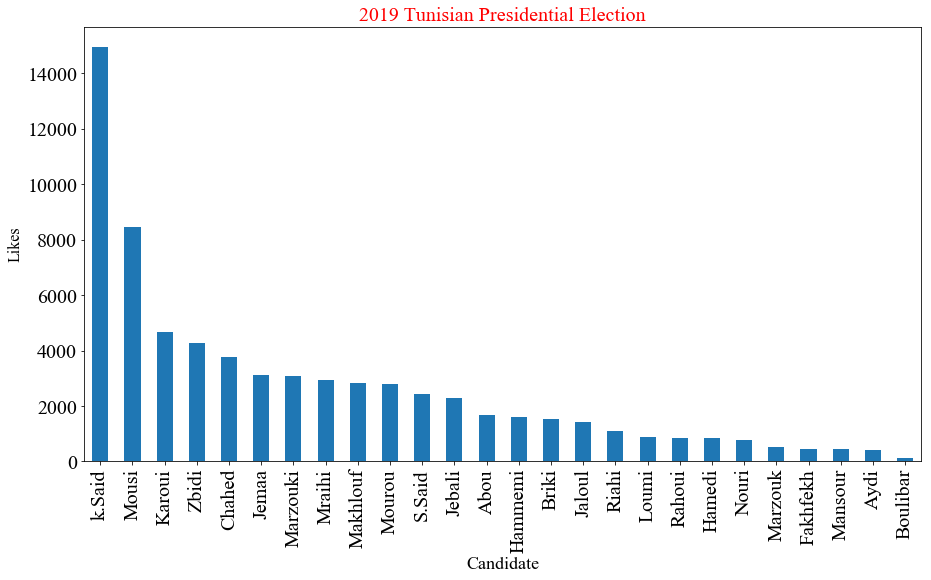

In [263]:
plt.figure(figsize=(15,8))

plt.xlabel('Candidate', fontsize=18)
plt.ylabel('Likes', fontsize=16)
plt.title("2019 Tunisian Presidential Election", fontsize=20, color="r")
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "20"
ax = data.groupby("Label").Likes.sum().sort_values(ascending = False).plot.bar()
ax.set_xlabel("Candidate")
ax.plot(kind='bar')
plt.savefig("election.png")

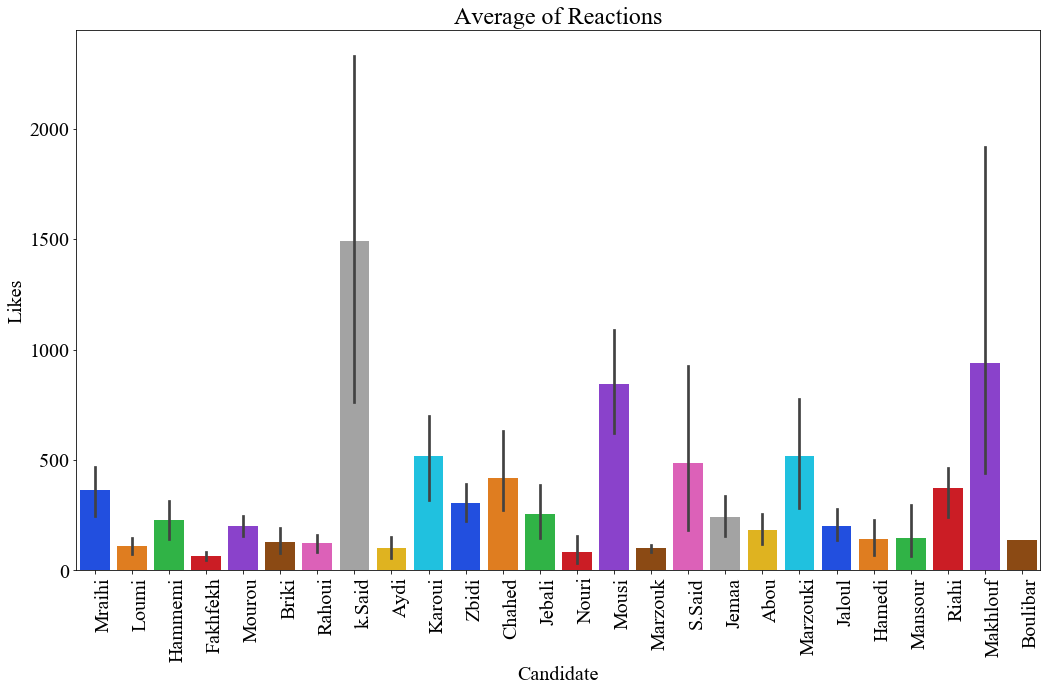

<Figure size 432x288 with 0 Axes>

In [315]:
plt.figure(figsize = (15,10))
ax = sns.barplot(x="Label",y = data.Likes.sort_values(), data=data, palette="bright")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left")
ax.set(xlabel='Candidate', ylabel='Likes', title="Average of Reactions")
plt.tight_layout()
plt.show()
plt.savefig("s.png")

In [274]:
data.Source.unique()

array(['Shems Fm', 'Mosaique fm', 'Jawhra fm'], dtype=object)

In [329]:
data.groupby("Source").Likes.sum()

Source
Jawhra fm       4444
Mosaique fm    23991
Shems Fm       39741
Name: Likes, dtype: int64

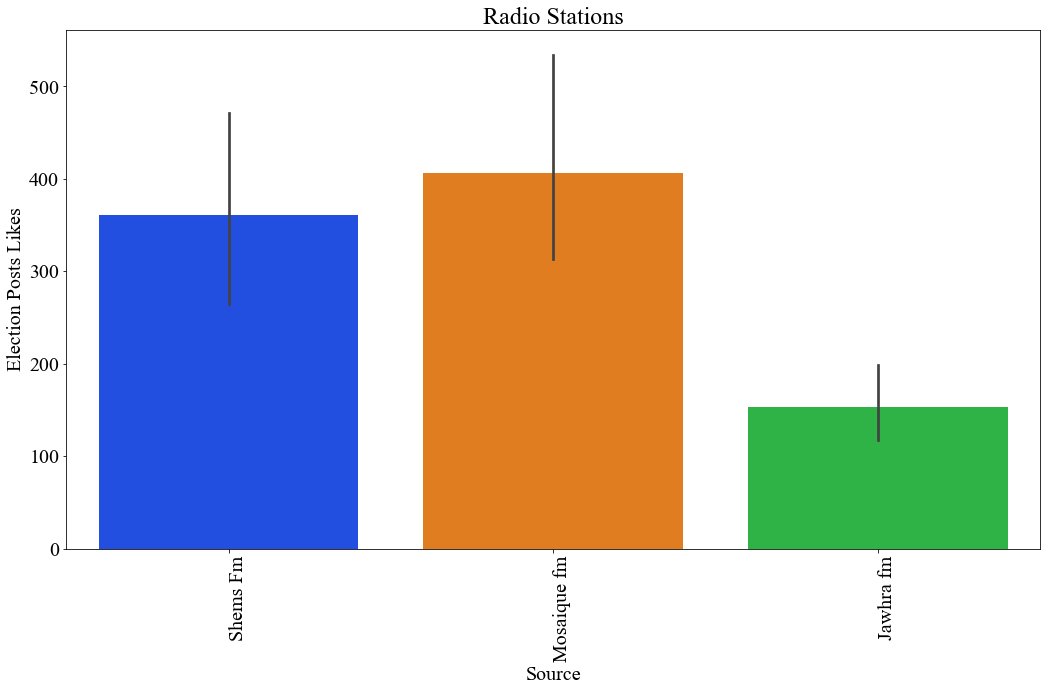

In [337]:
plt.figure(figsize = (15,10))
ax = sns.barplot(x="Source",y = data.Likes.sort_values(), data=data, palette="bright")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="left")
ax.set(xlabel='Source', ylabel='Election Posts Likes', title="Radio Stations")
plt.tight_layout()
plt.show()

Classification of different radio stations pages based on average likes on election related posts.